###Conjunto de dados de previsão padrão de empréstimo

Este conjunto de dados contém informações sobre empréstimos de clientes, incluindo dados demográficos de clientes, detalhes de empréstimos e status de inadimplência. O conjunto de dados pode ser usado para diversas análises de dados e tarefas de aprendizado de máquina, como prever o risco de inadimplência de empréstimos. O conjunto de dados consiste nas seguintes colunas:

customer_id: identificador exclusivo para cada cliente

customer_age: Idade do cliente

customer_income: Renda anual do cliente

home_ownership: status de propriedade da casa (por exemplo, ALUGUEL, PRÓPRIO,
HIPOTECA)

Employment_duration: Duração do emprego em meses

empréstimo_intent: Finalidade do empréstimo (por exemplo, PESSOAL, EDUCAÇÃO,
MÉDICO, EMPREENDIMENTO)

empréstimo_grade: Nota atribuída ao empréstimo

empréstimo_amnt: valor do empréstimo solicitado

empréstimo_int_rate: Taxa de juros do empréstimo

term_years: Prazo do empréstimo em anos

historic_default: Indica se o cliente possui histórico de inadimplência (S/N)

cred_hist_length: Comprimento do histórico de crédito do cliente em anos

Current_loan_status: Status atual do empréstimo  (INADIMPLÊNCIA, SEM INADIMPLÊNCIA)

##Importação das bibliotecas


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

Explorando o DataFrame

In [ ]:
dados = pd.read_csv('LoanDataset - LoansDatasest.csv')
dados.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


Visualização das informações do Dataframe

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32583 non-null  float64
 1   customer_age         32586 non-null  int64  
 2   customer_income      32586 non-null  object 
 3   home_ownership       32586 non-null  object 
 4   employment_duration  31691 non-null  float64
 5   loan_intent          32586 non-null  object 
 6   loan_grade           32586 non-null  object 
 7   loan_amnt            32585 non-null  object 
 8   loan_int_rate        29470 non-null  float64
 9   term_years           32586 non-null  int64  
 10  historical_default   11849 non-null  object 
 11  cred_hist_length     32586 non-null  int64  
 12  Current_loan_status  32582 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.2+ MB


Limpeza de dados e tratamento dos dados

1) Foi possível analisar que na coluna *Historical default* que tinha 20.733 valores ausentes, é importante ressaltar que essa coluna é responsável por registrar se a pessoas tem ou não tem histórico de inadiplência.Optei por trocar esses valores NaN's por *missing* ou seja ausente, visto que pode ter sido a primeira vez que a pessoa foi recorrer ao empréstimo, isso é apenas uma suposição essa ideia

2) Foi necessário tratar a coluna *Loan amnt* visto que ela está no tipo *object* mas possui valores númericos, isso acontece pois os valores númericos recebem *£* que é um caractere string e substituimos por espaço vazio, na mesma coluna os valores númericos recebem a virgula entre os números, a virgula é considerado uma string para isso substituimos por um espaço vazio

3) Na coluna *Customer Income* acontece a mesma ocasião da coluna comentada anteriormente apenas fazer um replace de um vírgula por um espaço vazio.


In [ ]:
dados['historical_default'] = dados['historical_default'].fillna("missing")

In [ ]:
dados['loan_amnt'] = dados['loan_amnt'].str.replace("£","").str.replace(",","").astype(float)

In [ ]:
dados['customer_income'] = dados['customer_income'].str.replace(",","").astype(int)

Aplicando *dados.info()* após o tratamento dessas colunas e dos dados

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32583 non-null  float64
 1   customer_age         32586 non-null  int64  
 2   customer_income      32586 non-null  int64  
 3   home_ownership       32586 non-null  object 
 4   employment_duration  31691 non-null  float64
 5   loan_intent          32586 non-null  object 
 6   loan_grade           32586 non-null  object 
 7   loan_amnt            32585 non-null  float64
 8   loan_int_rate        29470 non-null  float64
 9   term_years           32586 non-null  int64  
 10  historical_default   32586 non-null  object 
 11  cred_hist_length     32586 non-null  int64  
 12  Current_loan_status  32582 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 3.2+ MB


Visualização de valores ausentes no dataframe

In [ ]:
dados.isnull().sum()

,0
customer_id,3
customer_age,0
customer_income,0
home_ownership,0
employment_duration,895
loan_intent,0
loan_grade,0
loan_amnt,1
loan_int_rate,3116
term_years,0


Dropando dados ausentes dos dados

In [ ]:
dados.dropna(inplace=True)

Confirmando se há existência de valores NaN's

In [ ]:
dados.isnull().sum()

,0
customer_id,0
customer_age,0
customer_income,0
home_ownership,0
employment_duration,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
term_years,0


Dropando a coluna *customer_id* visto que essa feature não ira colaborar para construção da rede neural

In [ ]:
dados.drop(columns=['customer_id'], axis = 1, inplace=True)

In [ ]:
dados.head()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,22,59000,RENT,123.0,PERSONAL,C,35000.0,16.02,10,Y,3,DEFAULT
1,21,9600,OWN,5.0,EDUCATION,A,1000.0,11.14,1,missing,2,NO DEFAULT
2,25,9600,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5,N,3,DEFAULT
3,23,65500,RENT,4.0,MEDICAL,B,35000.0,15.23,10,N,2,DEFAULT
4,24,54400,RENT,8.0,MEDICAL,B,35000.0,14.27,10,Y,4,DEFAULT


Visualizando algumas estatística dos dados

É possível analisar que a coluna responsável pela idade, possui uma idade de valor igual a 144 anos,  

In [ ]:
dados.describe()

,customer_age,customer_income,employment_duration,loan_amnt,loan_int_rate,term_years,cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000
mean,27.724981,6.665115e+04,4.789126,9.846346e+03,11.039523,4.771423,5.793177
std,6.325201,6.235844e+04,4.154982,2.310646e+04,3.229479,2.472164,4.038774
min,3.000000,4.000000e+03,0.000000,5.000000e+02,5.420000,1.000000,2.000000
25%,23.000000,3.945600e+04,2.000000,5.000000e+03,7.900000,3.000000,3.000000
50%,26.000000,5.591000e+04,4.000000,8.000000e+03,10.990000,4.000000,4.000000
75%,30.000000,8.000000e+04,7.000000,1.250000e+04,13.480000,7.000000,8.000000
max,144.000000,6.000000e+06,123.000000,3.500000e+06,23.220000,10.000000,30.000000


Verificando as classes da nossa variável target, as nossas classes estão balanceadas de forma exarcebada

In [ ]:
dados['Current_loan_status'].value_counts()

,count
Current_loan_status,
NO DEFAULT,22643
DEFAULT,5995


Foi necessário esse tratamento desses dados, pois pela minha consulta esses dados não possuem clareza e nem certeza que esse valores podem existir

In [ ]:
dados = dados[dados['customer_age'] != 144]
dados = dados[dados['employment_duration'] !=123]
dados = dados[dados['cred_hist_length'] !=30]

#Análise de Dados
Iremos utilizar a técnica abaixo de coletar e separar colunas que são catégoricas ou númericas

In [ ]:
categorical_val = []
continuos_val =[]
for column in dados.columns:
  if dados[column].dtype == 'float64' or dados[column].dtype == 'int64':
    continuos_val.append(column)
  else:
    categorical_val.append(column)

PLotar as colunas categóricas

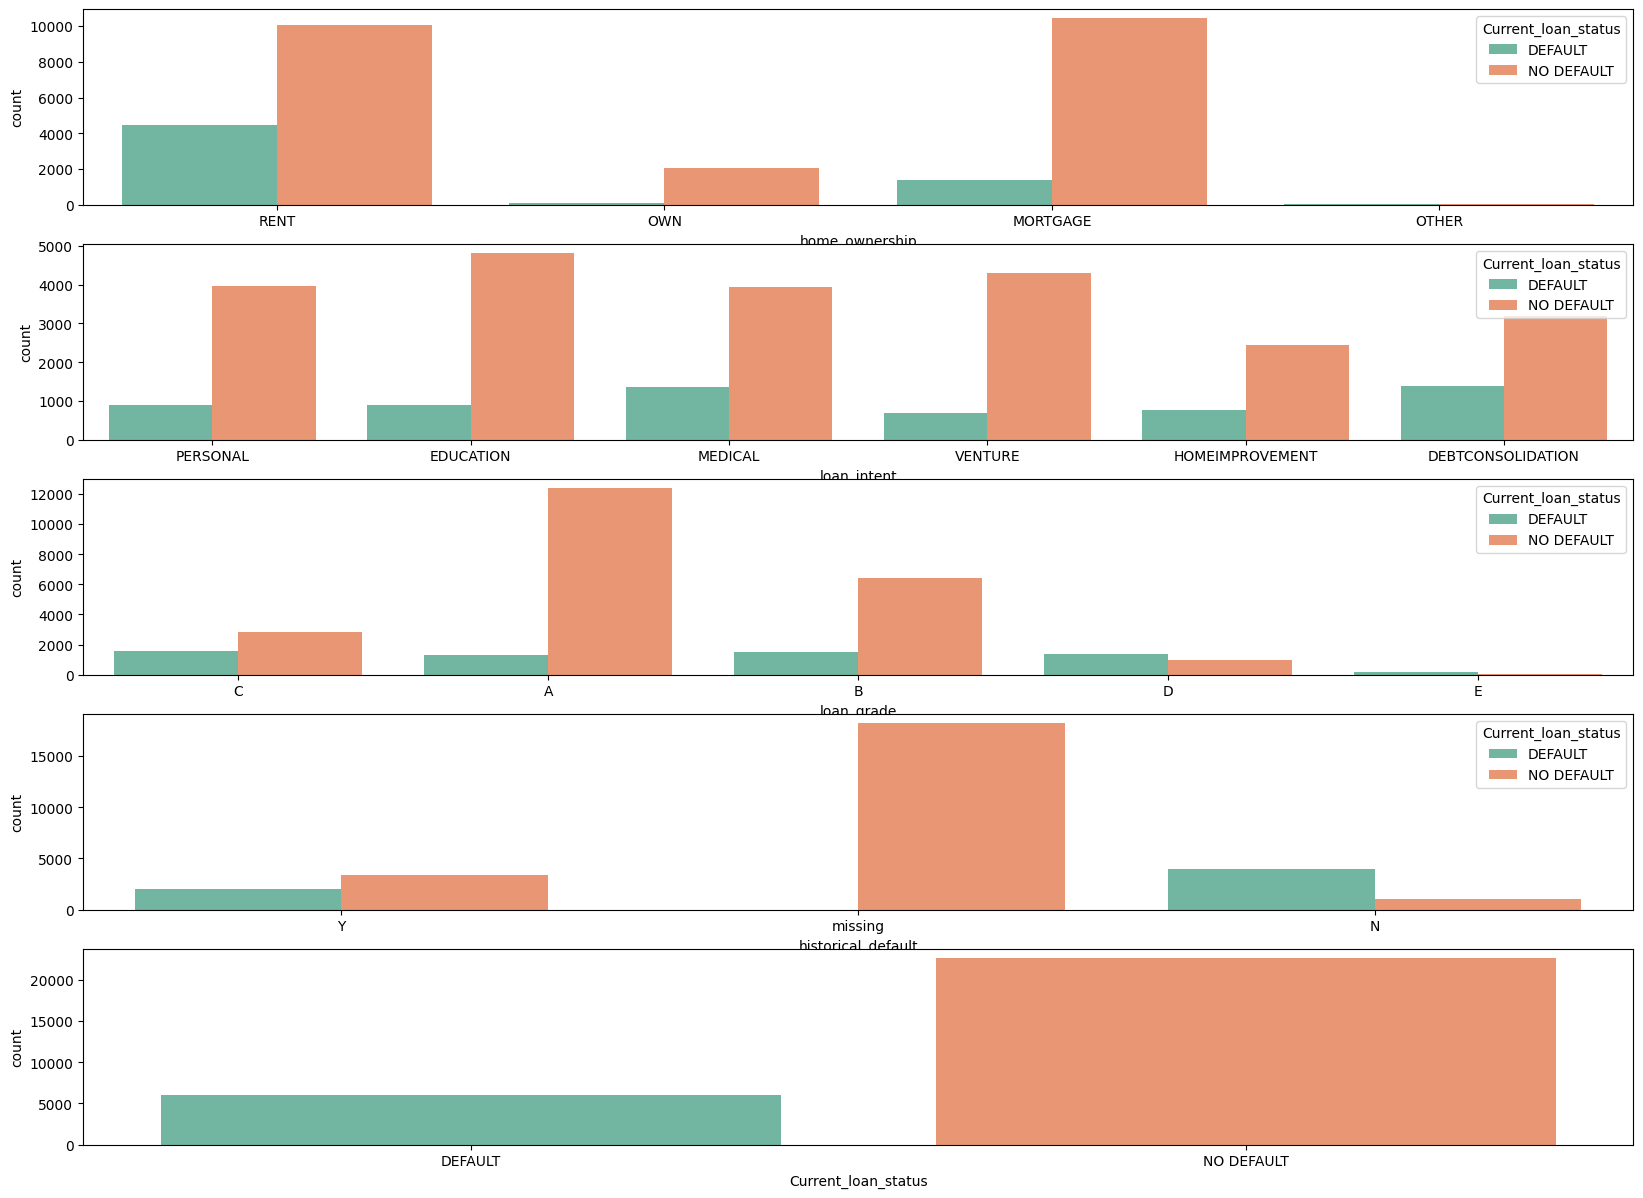

In [ ]:
plt.figure(figsize=(20, 30))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(10, 1, i)
    sns.countplot(x=column, hue='Current_loan_status', data=dados, palette ='Set2')
    plt.xlabel(column)

Ploatr dados numéricos

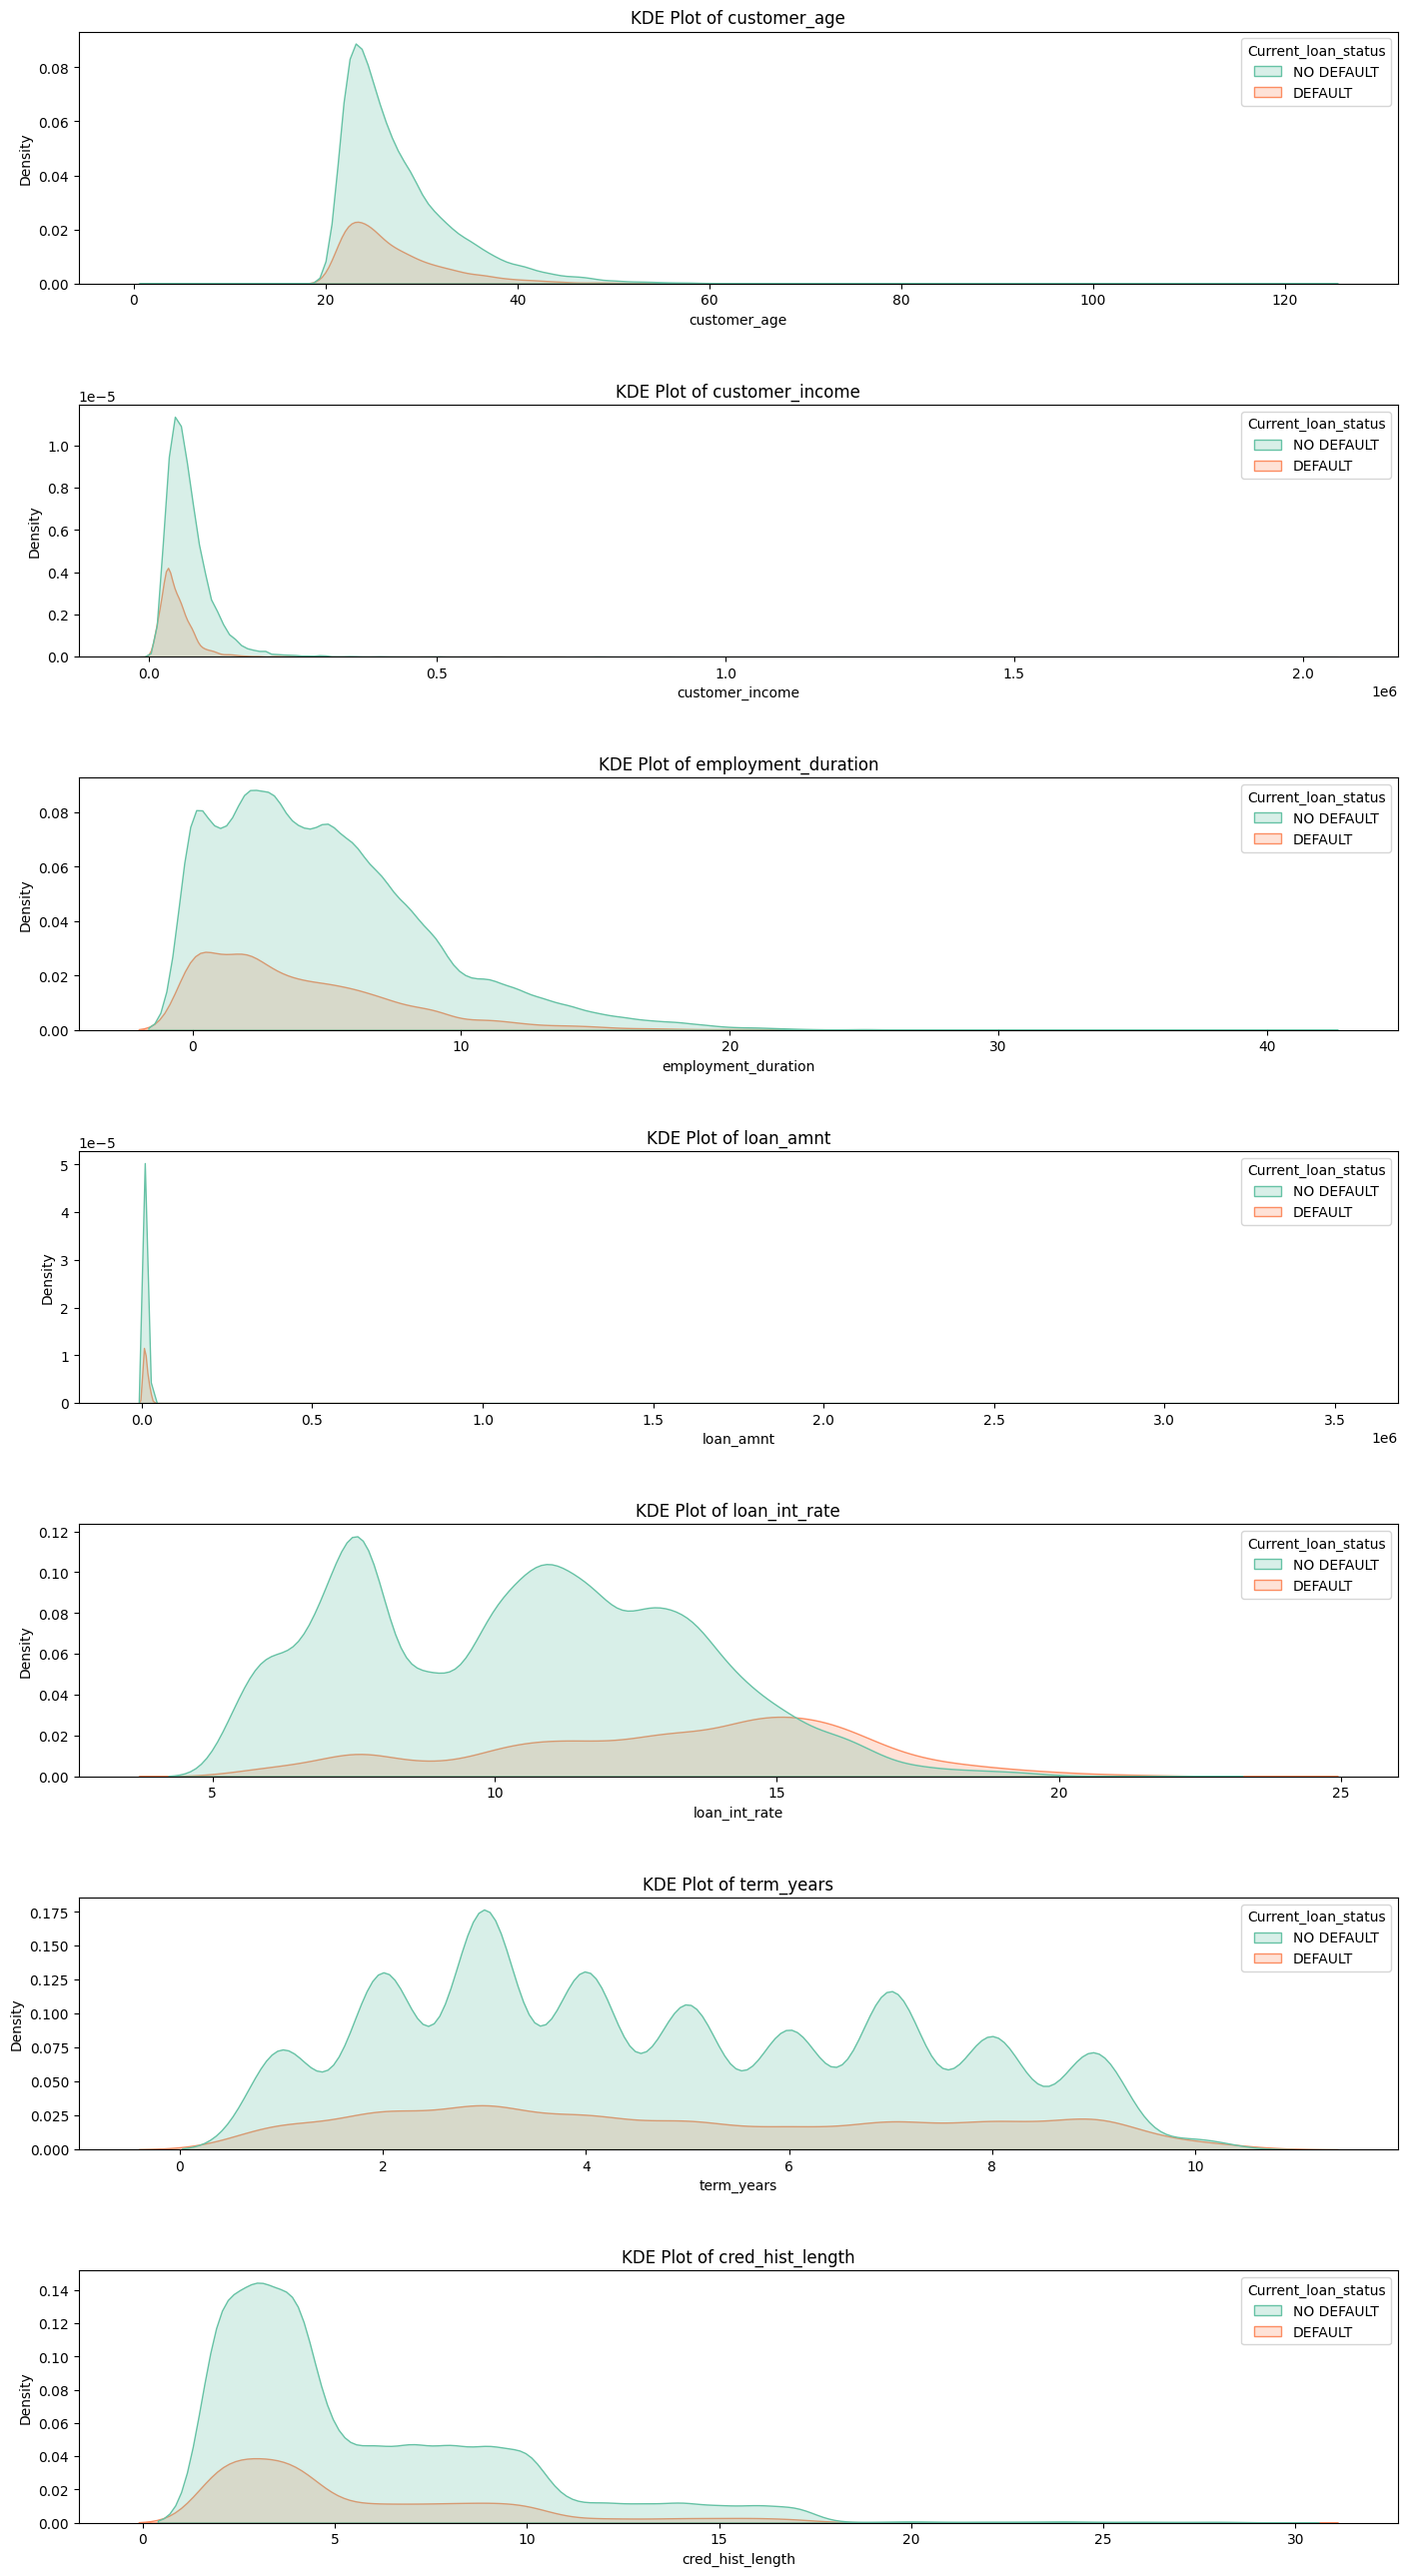

In [ ]:
plt.figure(figsize=(15, 30))
for i, column in enumerate(continuos_val, 1):
    plt.subplot(8, 1, i)
    sns.kdeplot(x=column, hue="Current_loan_status", data=dados, palette="Set2", fill =True)
    plt.title(f"KDE Plot of {column}") # Changed title to reflect plot type
    plt.tight_layout(pad=4.0)
plt.show()


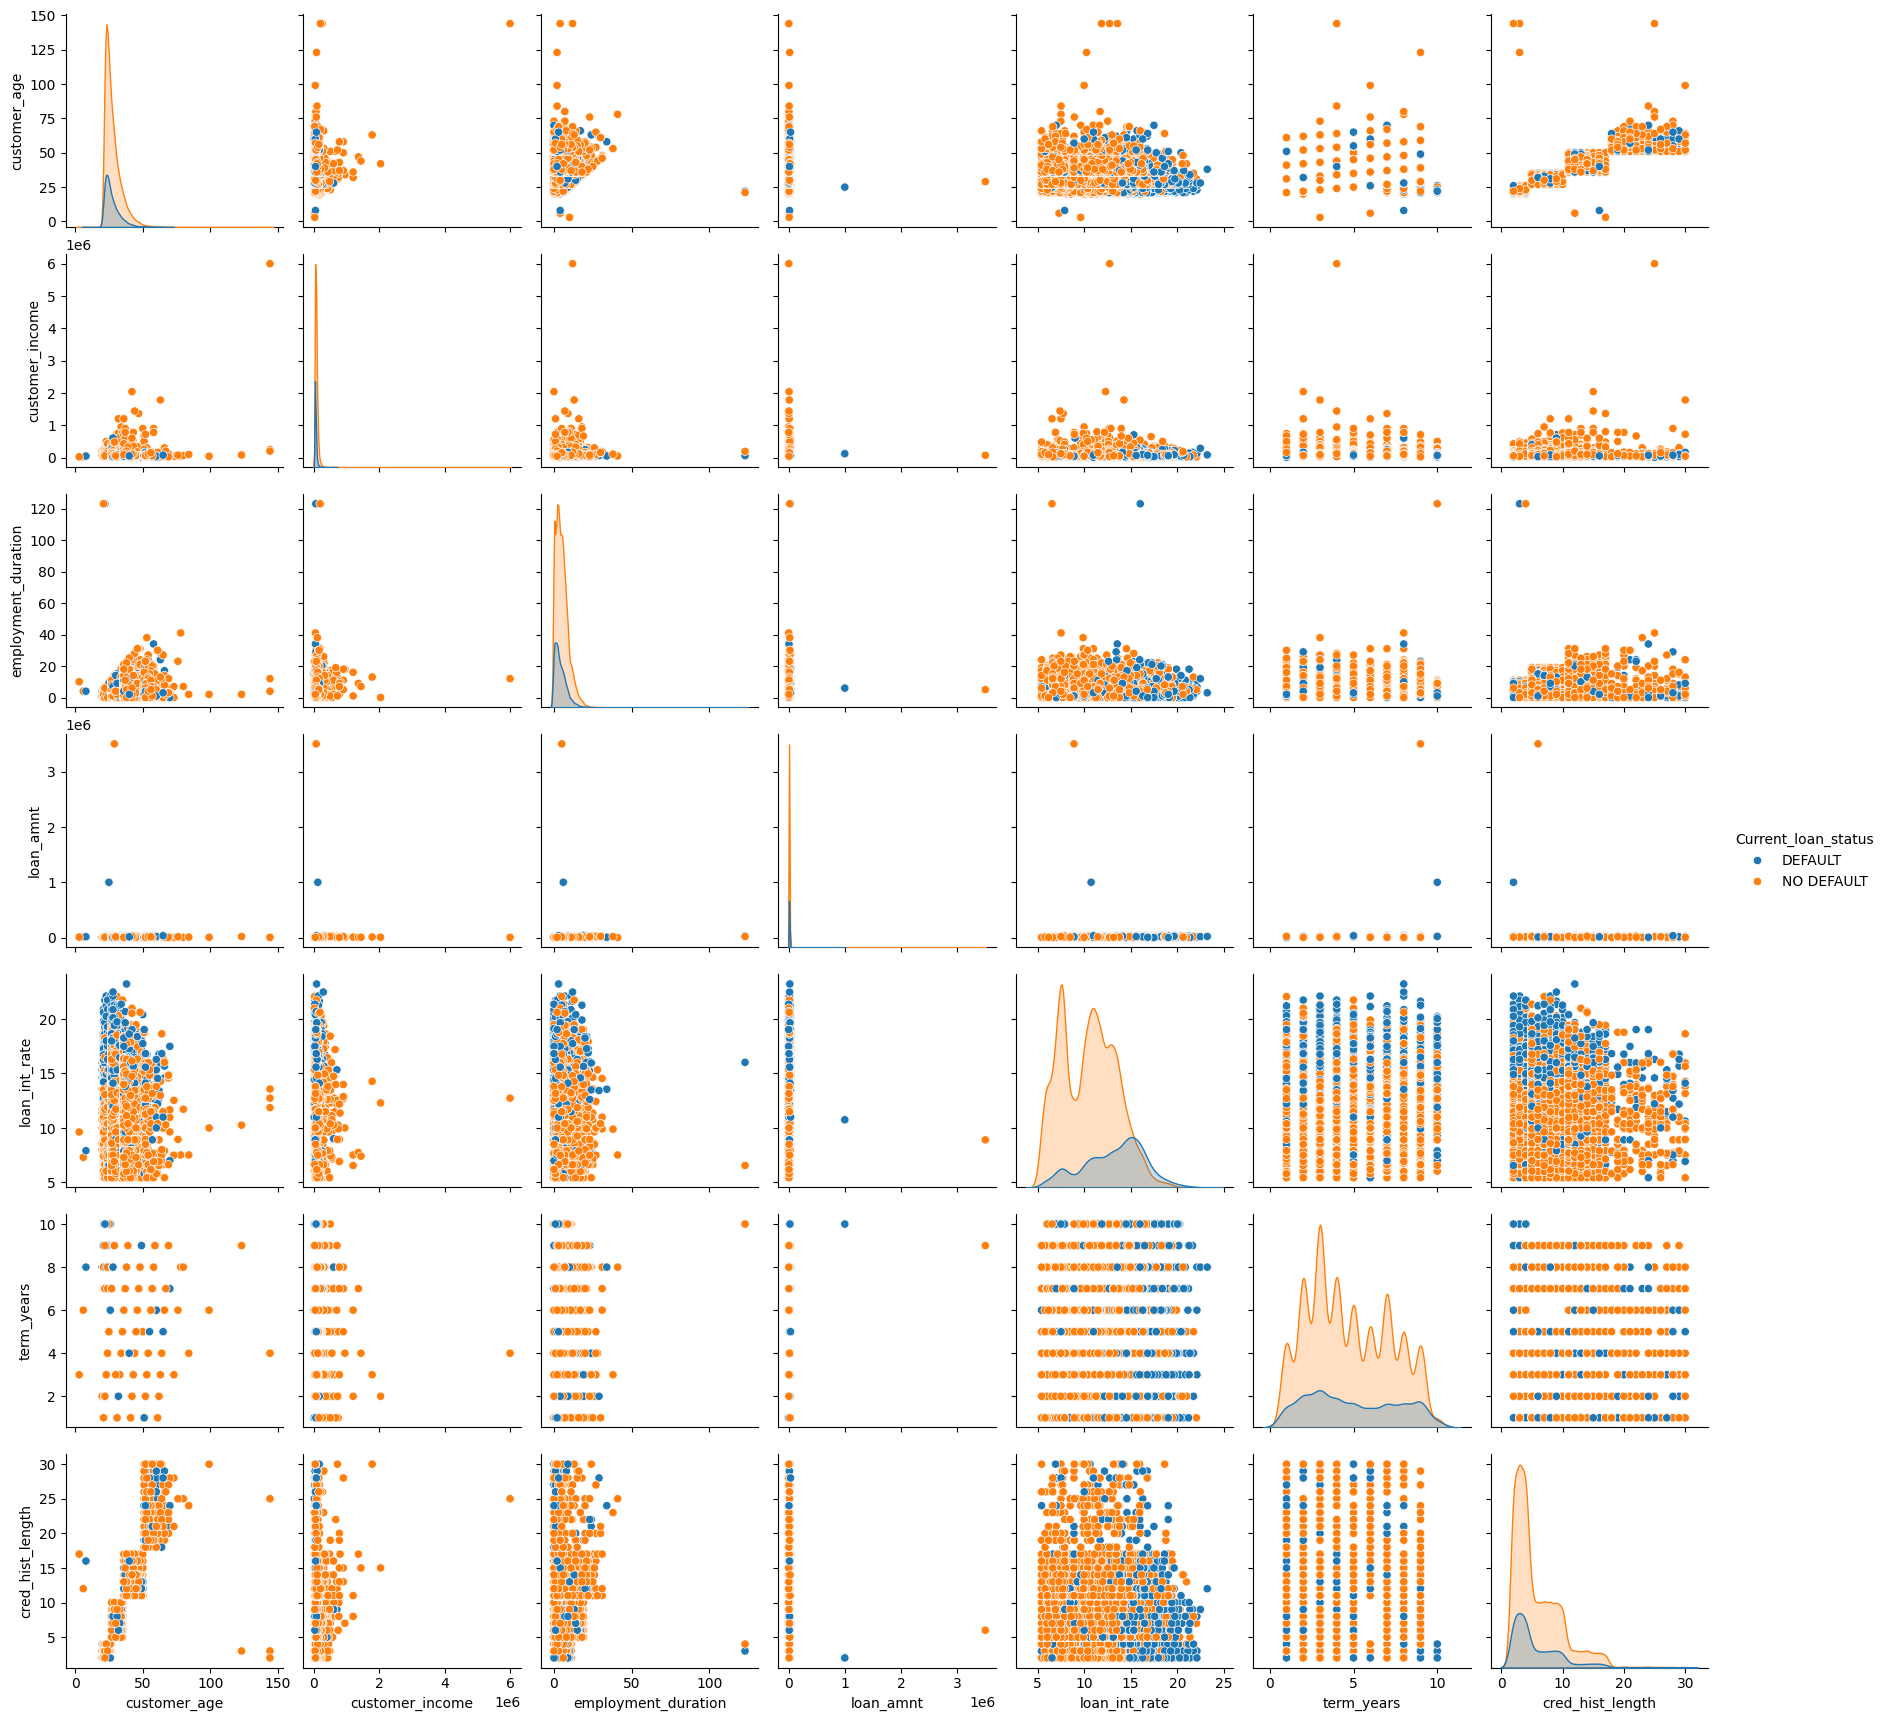

In [ ]:
sns.pairplot(dados, hue='Current_loan_status')

Análise de correlação dos dados

<Axes: >

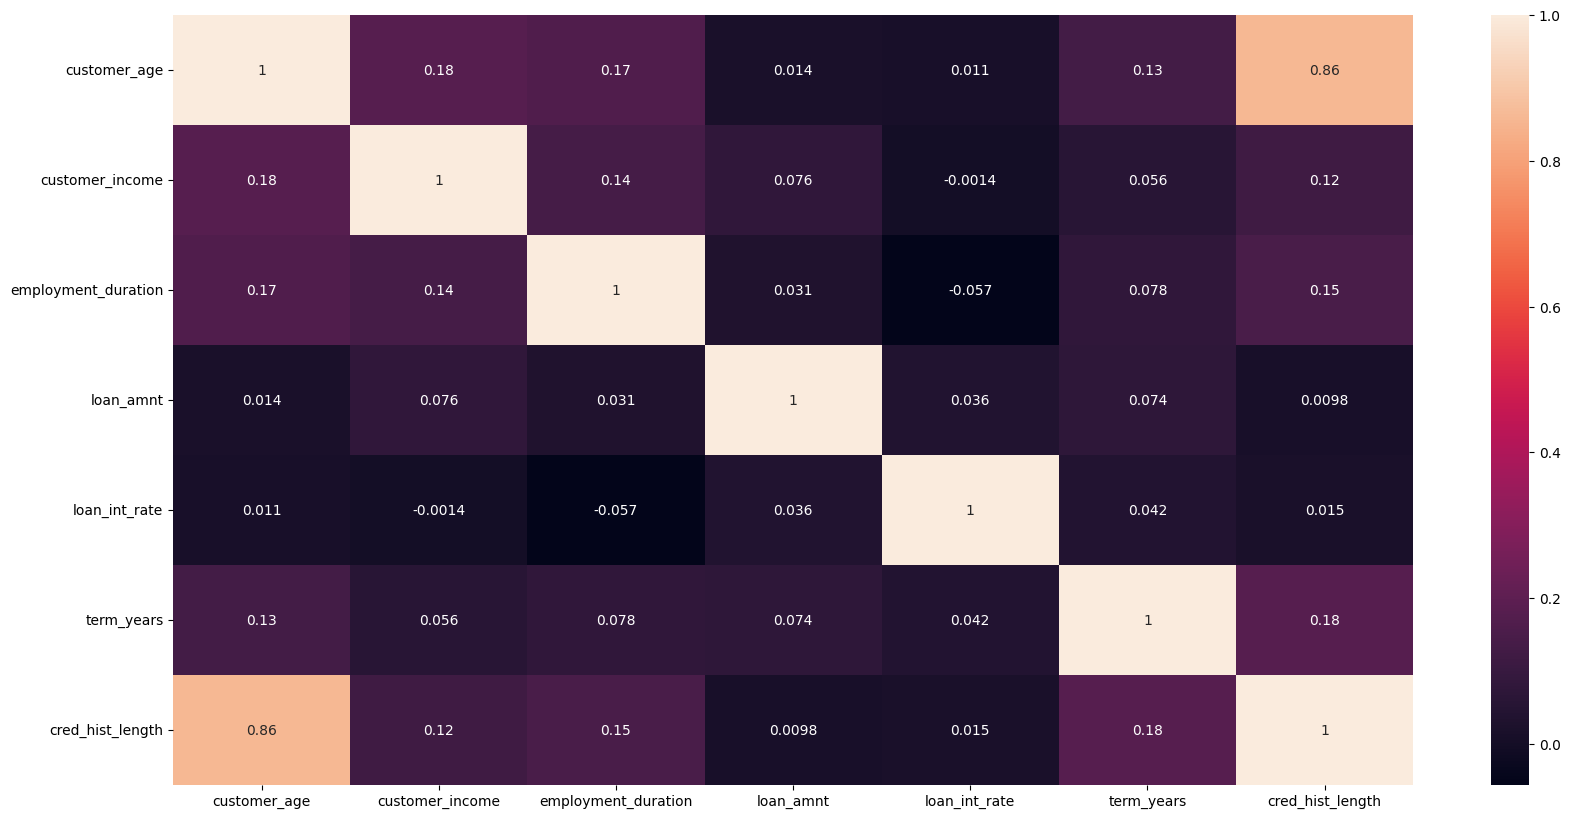

In [ ]:
plt.figure(figsize=(20,10 ))
sns.heatmap(dados.corr(numeric_only=True), annot=True)

# Pre-Processamento

In [ ]:
dados.head()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,22,59000,RENT,123.0,PERSONAL,C,35000.0,16.02,10,Y,3,DEFAULT
1,21,9600,OWN,5.0,EDUCATION,A,1000.0,11.14,1,missing,2,NO DEFAULT
2,25,9600,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5,N,3,DEFAULT
3,23,65500,RENT,4.0,MEDICAL,B,35000.0,15.23,10,N,2,DEFAULT
4,24,54400,RENT,8.0,MEDICAL,B,35000.0,14.27,10,Y,4,DEFAULT


Separação das variáveis independente e da variável alvo

In [ ]:
X = dados.drop(columns=['Current_loan_status'],axis =1)
Y = dados['Current_loan_status']

Processo de codificação da variável alvo

In [ ]:
le = LabelEncoder()
Y = le.fit_transform(Y)

Separação dos dados em treino e teste em 80% treino e 20% teste, além de estrartificar a variável *Y*

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify = Y)

Verificando a dimensão dos dados de treino e teste,esse verificação é necessário pois iremos separar colunas categóricas e numéricas para converter variáveis categóricas em uma representação numérica, mais especificamente em uma codificação one-hot e normalizar os dados numéricos respctivamente, após essa transformação é esperado um aumento da quantidade de colunas


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(22910, 11)
(5728, 11)
(22910,)
(5728,)


Selecionando colunas númericas para normalização dos dados

In [ ]:
colunas_numericas = X_train.select_dtypes(include=['float', 'int']).columns

Selecionando colunas categóricas para codificação dos dados

In [ ]:
colunas_categoricas = X_train.select_dtypes(include=['object']).columns

Criando uma instância para normalizar os dados.Ajustando e transformando os dados de forma que cada característica numérica tenha uma média de 0 e um desvio padrão de 1. Isso é feito ao subtrair a média de cada característica e depois dividir pelo desvio padrão.

In [ ]:
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[colunas_numericas])
X_test_num = scaler.transform(X_test[colunas_numericas])

Importação da biblioteca responsável pela codificação dos dados

In [ ]:
#Importação da biblioteca responsável pela codificação dos dados
onehotencoder = OneHotEncoder(handle_unknown='ignore')
X_train_cat = onehotencoder.fit_transform(X_train[colunas_categoricas])
X_test_cat = onehotencoder.transform(X_test[colunas_categoricas])

Aplicação da biblioetca *One Hot Enconder* para transformação das colunas categóricas

In [ ]:
X_train_array = np.concatenate((X_train_num, X_train_cat.toarray()), axis=1)
X_test_array = np.concatenate((X_test_num, X_test_cat.toarray()), axis=1)

Percebe-se que a quantidade colunas aumentaram, como era esperado, após essa verificação os dados estão prontos para aplicação dos modelos

In [ ]:
print(X_train_array.shape)
print(Y_train.shape)
print(X_test_array.shape)
print(Y_test.shape)

(22910, 25)
(22910,)
(5728, 25)
(5728,)


#Implementações dos modelos neurais

In [ ]:
'''Implementação da rede neural com apenas
2 camadas ocultas e 1 camada de saída'''
classifier = Sequential()
classifier.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu', input_dim = 25))
classifier.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train_array, Y_train, batch_size = 10, epochs = 20, validation_data=(X_test_array, Y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2291/2291 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8896 - loss: 0.2900 - val_accuracy: 0.9410 - val_loss: 0.1266
Epoch 2/20
2291/2291 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9429 - loss: 0.1265 - val_accuracy: 0.9475 - val_loss: 0.1139
Epoch 3/20
2291/2291 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9463 - loss: 0.1193 - val_accuracy: 0.9536 - val_loss: 0.1086
Epoch 4/20
2291/2291 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9519 - loss: 0.1098 - val_accuracy: 0.9550 - val_loss: 0.1046
Epoch 5/20
2291/2291 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9522 - loss: 0.1095 - val_accuracy: 0.9551 - val_loss: 0.1010
Epoch 6/20
2291/2291 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9532 - loss: 0.1070 - val_accuracy: 0.9572 - val_loss: 0.1000
Epoch 7/20
2291/2291 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9551 - loss: 0.1032 - val_accuracy: 0.9564 - val_loss: 0.1007
Epoch 8/20
2291/2291 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9557 - loss: 0.1043 -

Fazendo a predição do modelo *Classifier*

In [ ]:
y_pred = classifier.predict(X_test_array)
y_pred = (y_pred > 0.5).astype(int)


179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


accuracy do modelo *Classifier*

In [ ]:
accuracy_classifier = accuracy_score(Y_test, y_pred)
print("Acurácia do classificador: ", accuracy_classifier)

Acurácia do classificador:  0.9603701117318436


Métricas fundamentais para o modelo *Classifier*

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1199
           1       0.96      0.99      0.98      4529

    accuracy                           0.96      5728
   macro avg       0.95      0.92      0.94      5728
weighted avg       0.96      0.96      0.96      5728



Matriz de confusão do modelo *Classifier*

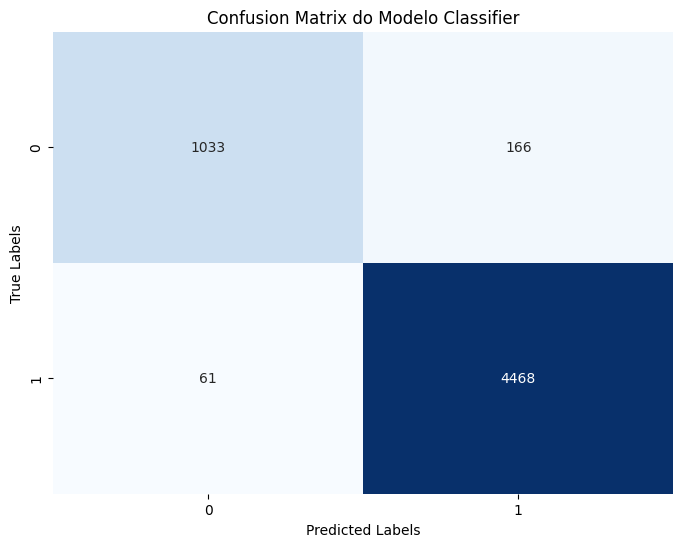

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix do Modelo Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#Modelo 2

In [ ]:
'''Implementação da rede neural com apenas
3 camadas ocultas e 1 camada de saída'''
modelo = Sequential()
modelo.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu', input_dim = 25))
modelo.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu'))
modelo.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu'))
modelo.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
modelo.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
modelo.fit(X_train_array, Y_train, batch_size = 10, epochs = 20, validation_data=(X_test_array, Y_test))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2291/2291 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8976 - loss: 0.2604 - val_accuracy: 0.9398 - val_loss: 0.1343
Epoch 2/20
2291/2291 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9480 - loss: 0.1245 - val_accuracy: 0.9480 - val_loss: 0.1105
Epoch 3/20
2291/2291 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9469 - loss: 0.1187 - val_accuracy: 0.9537 - val_loss: 0.1057
Epoch 4/20
2291/2291 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9509 - loss: 0.1132 - val_accuracy: 0.9516 - val_loss: 0.1044
Epoch 5/20
2291/2291 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9547 - loss: 0.1034 - val_accuracy: 0.9555 - val_loss: 0.1008
Epoch 6/20
2291/2291 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9595 - loss: 0.0985 - val_accuracy: 0.9546 - val_loss: 0.1004
Epoch 7/20
2291/2291 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9575 - loss: 0.1025 - val_accuracy: 0.9578 - val_loss: 0.0953
Epoch 8/20
2291/2291 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9599 - loss: 0.0961 - val_accura

Previsão do modelo 2

In [ ]:
y_pred_2 = modelo.predict(X_test_array)
y_pred_2 = (y_pred_2 > 0.5).astype(int)

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


accuracy do modelo 2

Métricas fundamentais do modelo 2

In [ ]:
accuracy_modelo = accuracy_score(Y_test, y_pred_2)
print("Acurácia do Modelo 2: ", accuracy_modelo)

Acurácia do Modelo 2:  0.9650837988826816


In [ ]:
print(classification_report(Y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1199
           1       0.97      0.98      0.98      4529

    accuracy                           0.97      5728
   macro avg       0.96      0.94      0.95      5728
weighted avg       0.96      0.97      0.96      5728



Matriz de confusão do modelo

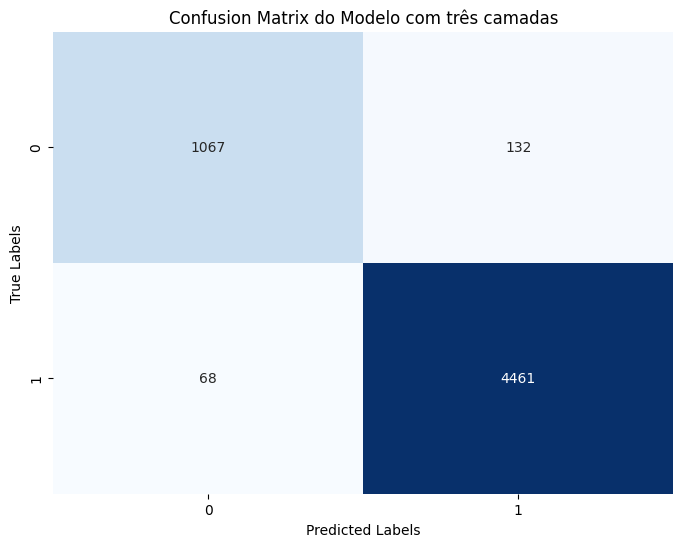

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred_2)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix do Modelo com três camadas')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#Modelo 3

In [ ]:
'''Implementação da rede neural com a seguinte composição
-3 camadas oculta
-1 camada com dropout (0.2)
-1 camada de saída'''
modelo2 = Sequential()
modelo2.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu', input_dim = 25))
modelo2.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu'))
modelo2.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu'))
modelo2.add(Dropout(0.2))
modelo2.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
modelo2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#batch-size: É o número de registros que vão submetidos a redeu neural para atualizar os pesos
#Sigmoid, pois se trata de definição de duas classes
modelo2.fit(X_train_array, Y_train, batch_size = 10, epochs = 20, validation_data=(X_test_array, Y_test))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2291/2291 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8888 - loss: 0.2802 - val_accuracy: 0.9497 - val_loss: 0.1179
Epoch 2/20
2291/2291 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9453 - loss: 0.1281 - val_accuracy: 0.9522 - val_loss: 0.1072
Epoch 3/20
2291/2291 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9512 - loss: 0.1177 - val_accuracy: 0.9551 - val_loss: 0.1031
Epoch 4/20
2291/2291 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9556 - loss: 0.1086 - val_accuracy: 0.9572 - val_loss: 0.0994
Epoch 5/20
2291/2291 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9573 - loss: 0.1085 - val_accuracy: 0.9576 - val_loss: 0.0982
Epoch 6/20
2291/2291 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9602 - loss: 0.1045 - val_accuracy: 0.9602 - val_loss: 0.0954
Epoch 7/20
2291/2291 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9592 - loss: 0.1044 - val_accuracy: 0.9590 - val_loss: 0.0952
Epoch 8/20
2291/2291 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9588 - loss: 0.1031 - val_accura

Previsão do modelo

In [ ]:
y_pred_3 = modelo2.predict(X_test_array)
y_pred_3 = (y_pred_3 > 0.5).astype(int)

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy do modelo

In [ ]:
accuracy_modelo2 = accuracy_score(Y_test, y_pred_3)
print("Acurácia do Modelo 3: ", accuracy_modelo2)

Acurácia do Modelo 3:  0.9622905027932961


In [ ]:
print(classification_report(Y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.97      0.85      0.90      1199
           1       0.96      0.99      0.98      4529

    accuracy                           0.96      5728
   macro avg       0.96      0.92      0.94      5728
weighted avg       0.96      0.96      0.96      5728



Matriz de confusão do modelo

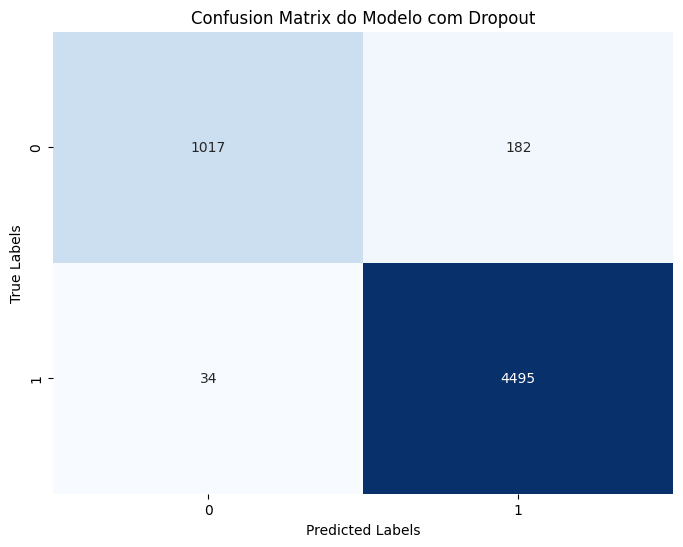

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred_3)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix do Modelo com Dropout')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#Analisando os Features
Iremos escolher o modelo *classifier* para analisar as features mais importantes do modelo

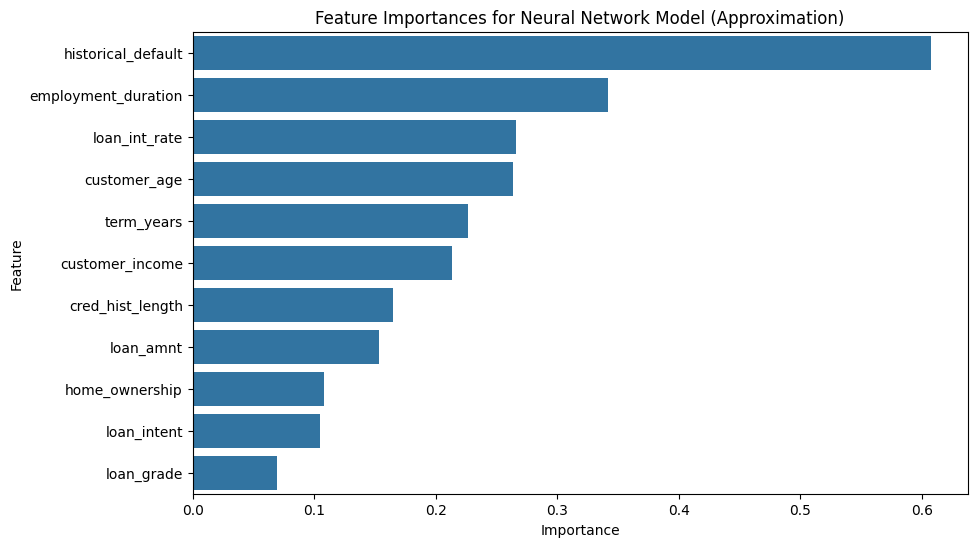

In [ ]:
weights = classifier.layers[0].get_weights()[0]
importances = np.mean(np.abs(weights), axis=1)

features = X_train.columns

importances = importances[:len(features)]

feature_importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})

feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances for Neural Network Model (Approximation)')
plt.show()

##Análise da curva ROC

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


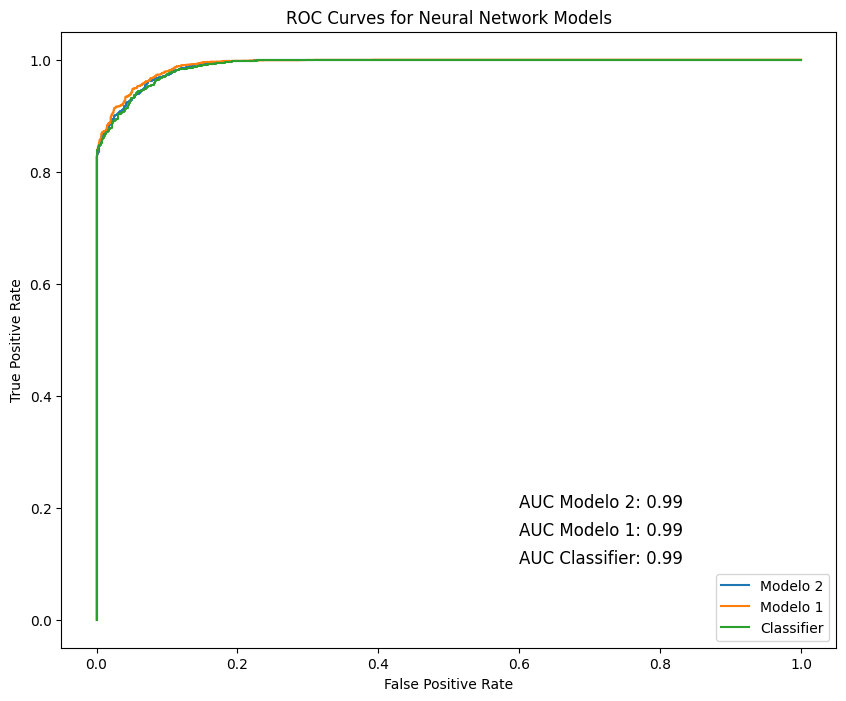

'\nax.set_xlabel("False Positive Rate")\nax.set_ylabel("True Positive Rate")\nax.set_title("ROC Curves for Neural Network Models")\nplt.show()\n'

In [ ]:


# Calculate ROC curves for each model
fpr_modelo2, tpr_modelo2, thresholds_modelo2 = roc_curve(Y_test, modelo2.predict(X_test_array))
fpr_modelo, tpr_modelo, thresholds_modelo = roc_curve(Y_test, modelo.predict(X_test_array))
fpr_classifier, tpr_classifier, thresholds_classifier = roc_curve(Y_test, classifier.predict(X_test_array))

# Create ROC Curve display objects (without 'label' argument)
disp_modelo2 = RocCurveDisplay(fpr=fpr_modelo2, tpr=tpr_modelo2, roc_auc=auc(fpr_modelo2, tpr_modelo2))
disp_modelo = RocCurveDisplay(fpr=fpr_modelo, tpr=tpr_modelo, roc_auc=auc(fpr_modelo, tpr_modelo))
disp_classifier = RocCurveDisplay(fpr=fpr_classifier, tpr=tpr_classifier, roc_auc=auc(fpr_classifier, tpr_classifier))

# Plot ROC curves
fig, ax = plt.subplots(figsize=(10, 8))

disp_modelo2.plot(ax=ax)
disp_modelo.plot(ax=ax)
disp_classifier.plot(ax=ax)

# Add legend manually
ax.legend(["Modelo 1", "Modelo 2", "Classifier"], loc="lower right")  # Add legend manually

ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curves for Neural Network Models")

# Add legend manually
ax.legend(["Modelo 2", "Modelo 1", "Classifier"], loc="lower right")



# Add AUC scores to the plot
ax.text(0.6, 0.2, f"AUC Modelo 2: {auc(fpr_modelo2, tpr_modelo2):.2f}", fontsize=12)
ax.text(0.6, 0.15, f"AUC Modelo 1: {auc(fpr_modelo, tpr_modelo):.2f}", fontsize=12)
ax.text(0.6, 0.1, f"AUC Classifier: {auc(fpr_classifier, tpr_classifier):.2f}", fontsize=12)

plt.show()
'''
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curves for Neural Network Models")
plt.show()
'''

##Métrica de resultados

In [ ]:

metrics = ['Acurácia', 'Precisão 0', 'Precisão 1', 'Recall 0', 'Recall 1', 'AUC']
modelo2_values = [accuracy_modelo2,0.98, 0.96, 0.85, 0.99, 0.99  ]
modelo_values = [accuracy_modelo, 0.95, 0.96, 0.86, 0.99, 0.99]
classifier_values = [accuracy_classifier, 0.93, 0.97, 0.88, 0.98, 0.99]

data1 = {
    'Metric': metrics,
    'Classifier': classifier_values,
    'Modelo 2': modelo2_values,
    'Modelo 1': modelo_values,
}

# Create a DataFrame
df = pd.DataFrame(data1)


       Metric  Classifier  Modelo 2  Modelo 1
0    Acurácia     0.96037  0.962291  0.965084
1  Precisão 0     0.93000  0.980000  0.950000
2  Precisão 1     0.97000  0.960000  0.960000
3    Recall 0     0.88000  0.850000  0.860000
4    Recall 1     0.98000  0.990000  0.990000
5         AUC     0.99000  0.990000  0.990000


In [ ]:
df

,Metric,Classifier,Modelo 2,Modelo 1
0,Acurácia,0.96037,0.962291,0.965084
1,Precisão 0,0.93000,0.980000,0.950000
2,Precisão 1,0.97000,0.960000,0.960000
3,Recall 0,0.88000,0.850000,0.860000
4,Recall 1,0.98000,0.990000,0.990000
5,AUC,0.99000,0.990000,0.990000


##Conclusão

Esse projeto consta aplicar conceitos e técnicas de redes neurais, Processamento de dados catégoricos e dados númericos, além de aplicar técnicas de aprindizagem de máquina.Esse DataFrame foi retirado da plataforma Kaggle [Loan-Dataset](https://www.kaggle.com/datasets/prakashraushan/loan-dataset)
